In [1]:
# Data Processing & Math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Natural Language Processing Tools
import nltk
from nltk.corpus import stopwords
import string
import re

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time


# Filter & Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# List Available `CSV` Files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv'): 
            print(os.path.join(dirname, filename))

/kaggle/input/d/gauravduttakiit/resume-dataset/UpdatedResumeDataSet.csv
/kaggle/input/resume-dataset/Resume/Resume.csv


In [2]:
dfA = pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')
dfB = pd.read_csv('/kaggle/input/d/gauravduttakiit/resume-dataset/UpdatedResumeDataSet.csv')

In [3]:
dfA.head(10)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
5,11592605,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR
6,25824789,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR
7,15375009,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR
8,11847784,HR SPECIALIST Summary Posses...,"<div class=""fontsize fontface vmargins hmargin...",HR
9,32896934,HR CLERK Summary Translates ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [5]:
dfA['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [6]:
dfA['Category'] = dfA['Category'].str.title()

In [7]:
dfA['Category'].replace({'Information-Technology': 'ICT', 'Hr': 'HR', 'Business-Development': 'Business Development', 'Digital-Media': 'Digital Media', 'Bpo': 'BPO', 'Public-Relations': 'Public Relations', 'Healthcare': 'Healthcare & Fitness', 'Fitness': 'Healthcare & Fitness'}, inplace=True)

In [8]:
dfA['Category'].unique()

array(['HR', 'Designer', 'ICT', 'Teacher', 'Advocate',
       'Business Development', 'Healthcare & Fitness', 'Agriculture',
       'BPO', 'Sales', 'Consultant', 'Digital Media', 'Automobile',
       'Chef', 'Finance', 'Apparel', 'Engineering', 'Accountant',
       'Construction', 'Public Relations', 'Banking', 'Arts', 'Aviation'],
      dtype=object)

In [9]:
dfB.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [10]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [11]:
dfB['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
dfB['Category'].replace({'Hadoop': 'Data Science'}, inplace=True)

In [13]:
dfA = dfA[['Category', 'Resume_str']]
dfA.rename(columns = {'Resume_str': 'Resume'}, inplace=True)
df = pd.concat([dfA, dfB])
df.sample(10)

,Category,Resume
2176,Banking,SENIOR COMMERCIAL BUSINESS BANKING RELA...
2074,Public Relations,MANAGER OF PUBLIC RELATIONS AND COMMU...
1130,Consultant,CONSULTANT Summary Resource...
2257,Banking,REVOLVING CREDIT SUPPORT SPECIALIST ...
1999,Construction,"ADMINISTRATIVE ASSOCIATE II, CONSTRUC..."
1965,Construction,CS GENERAL CONSTRUCTION WORKER...
351,Teacher,TEACHER Professional Summary ...
370,Teacher,TEACHER Career Overview Hig...
830,DotNet Developer,TECHNICAL SKILLS â Programming Languages: C#...
248,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...


In [14]:
def data_clean(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()

In [15]:
df['Cleaned_Resume'] = df['Resume'].apply(lambda x: data_clean(x))
df.sample(10)

,Category,Resume,Cleaned_Resume
2369,Aviation,AVIATION MAINTAINER Professiona...,aviation maintainer professional summary 6 ye...
1721,Engineering,ENGINEERING MANAGER Summary...,engineering manager summary mechanical engine...
219,ICT,INFORMATION TECHNOLOGY SUPERVISOR ...,information technology supervisor summary see...
2224,Banking,"SOHO PROPERTIES, SUMMER ANALYST ...",soho prope ies summer analyst areas of expert...
118,Designer,TECHNICAL DESIGNER Summary S...,technical designer summary special qualificat...
570,Business Development,BUSINESS DEVELOPMENT ANALYST ...,business development analyst executive profil...
288,ICT,INFORMATION TECHNOLOGY HELP DESK SPEC...,information technology help desk specialist h...
1579,Finance,SENIOR EXECUTIVE - FINANCE Prof...,senior executive finance profile to be part o...
267,Health and fitness,Personal Skills: â¢ Good verbal and written c...,personal skills good verbal and written commun...
2342,Arts,AM- REPLENISHMENT STOCKER Summa...,am replenishment stocker summary adaptable jo...


In [16]:
del_words = ['name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address', 'phone',
             'email', 'linkedin', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
             'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
             'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year']

In [17]:
stop_words = set(stopwords.words('english')+['``',"''"]+del_words)
total_words = []
sentences = df['Cleaned_Resume'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_sentences += sentence
    required_words = nltk.word_tokenize(sentence)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            total_words.append(word)

In [18]:
word_freq_fist = nltk.FreqDist(total_words)
most_freq = word_freq_fist.most_common(50)
print(most_freq)

[('management', 14173), ('sales', 9100), ('business', 9062), ('project', 8860), ('customer', 8702), ('team', 8023), ('new', 6954), ('development', 6934), ('service', 6647), ('training', 6202), ('data', 5953), ('work', 5804), ('system', 5122), ('manager', 5121), ('information', 5049), ('marketing', 4720), ('support', 4696), ('office', 4598), ('financial', 4394), ('client', 4357), ('including', 4260), ('process', 4241), ('university', 4239), ('staff', 4142), ('design', 4128), ('systems', 4088), ('professional', 3976), ('quality', 3963), ('reports', 3897), ('exprience', 3829), ('customers', 3825), ('services', 3803), ('operations', 3799), ('months', 3731), ('developed', 3651), ('clients', 3631), ('software', 3531), ('analysis', 3505), ('managed', 3503), ('1', 3390), ('product', 3308), ('high', 3265), ('using', 3234), ('description', 3203), ('time', 3166), ('program', 3157), ('responsible', 3129), ('january', 3118), ('projects', 3100), ('microsoft', 3049)]


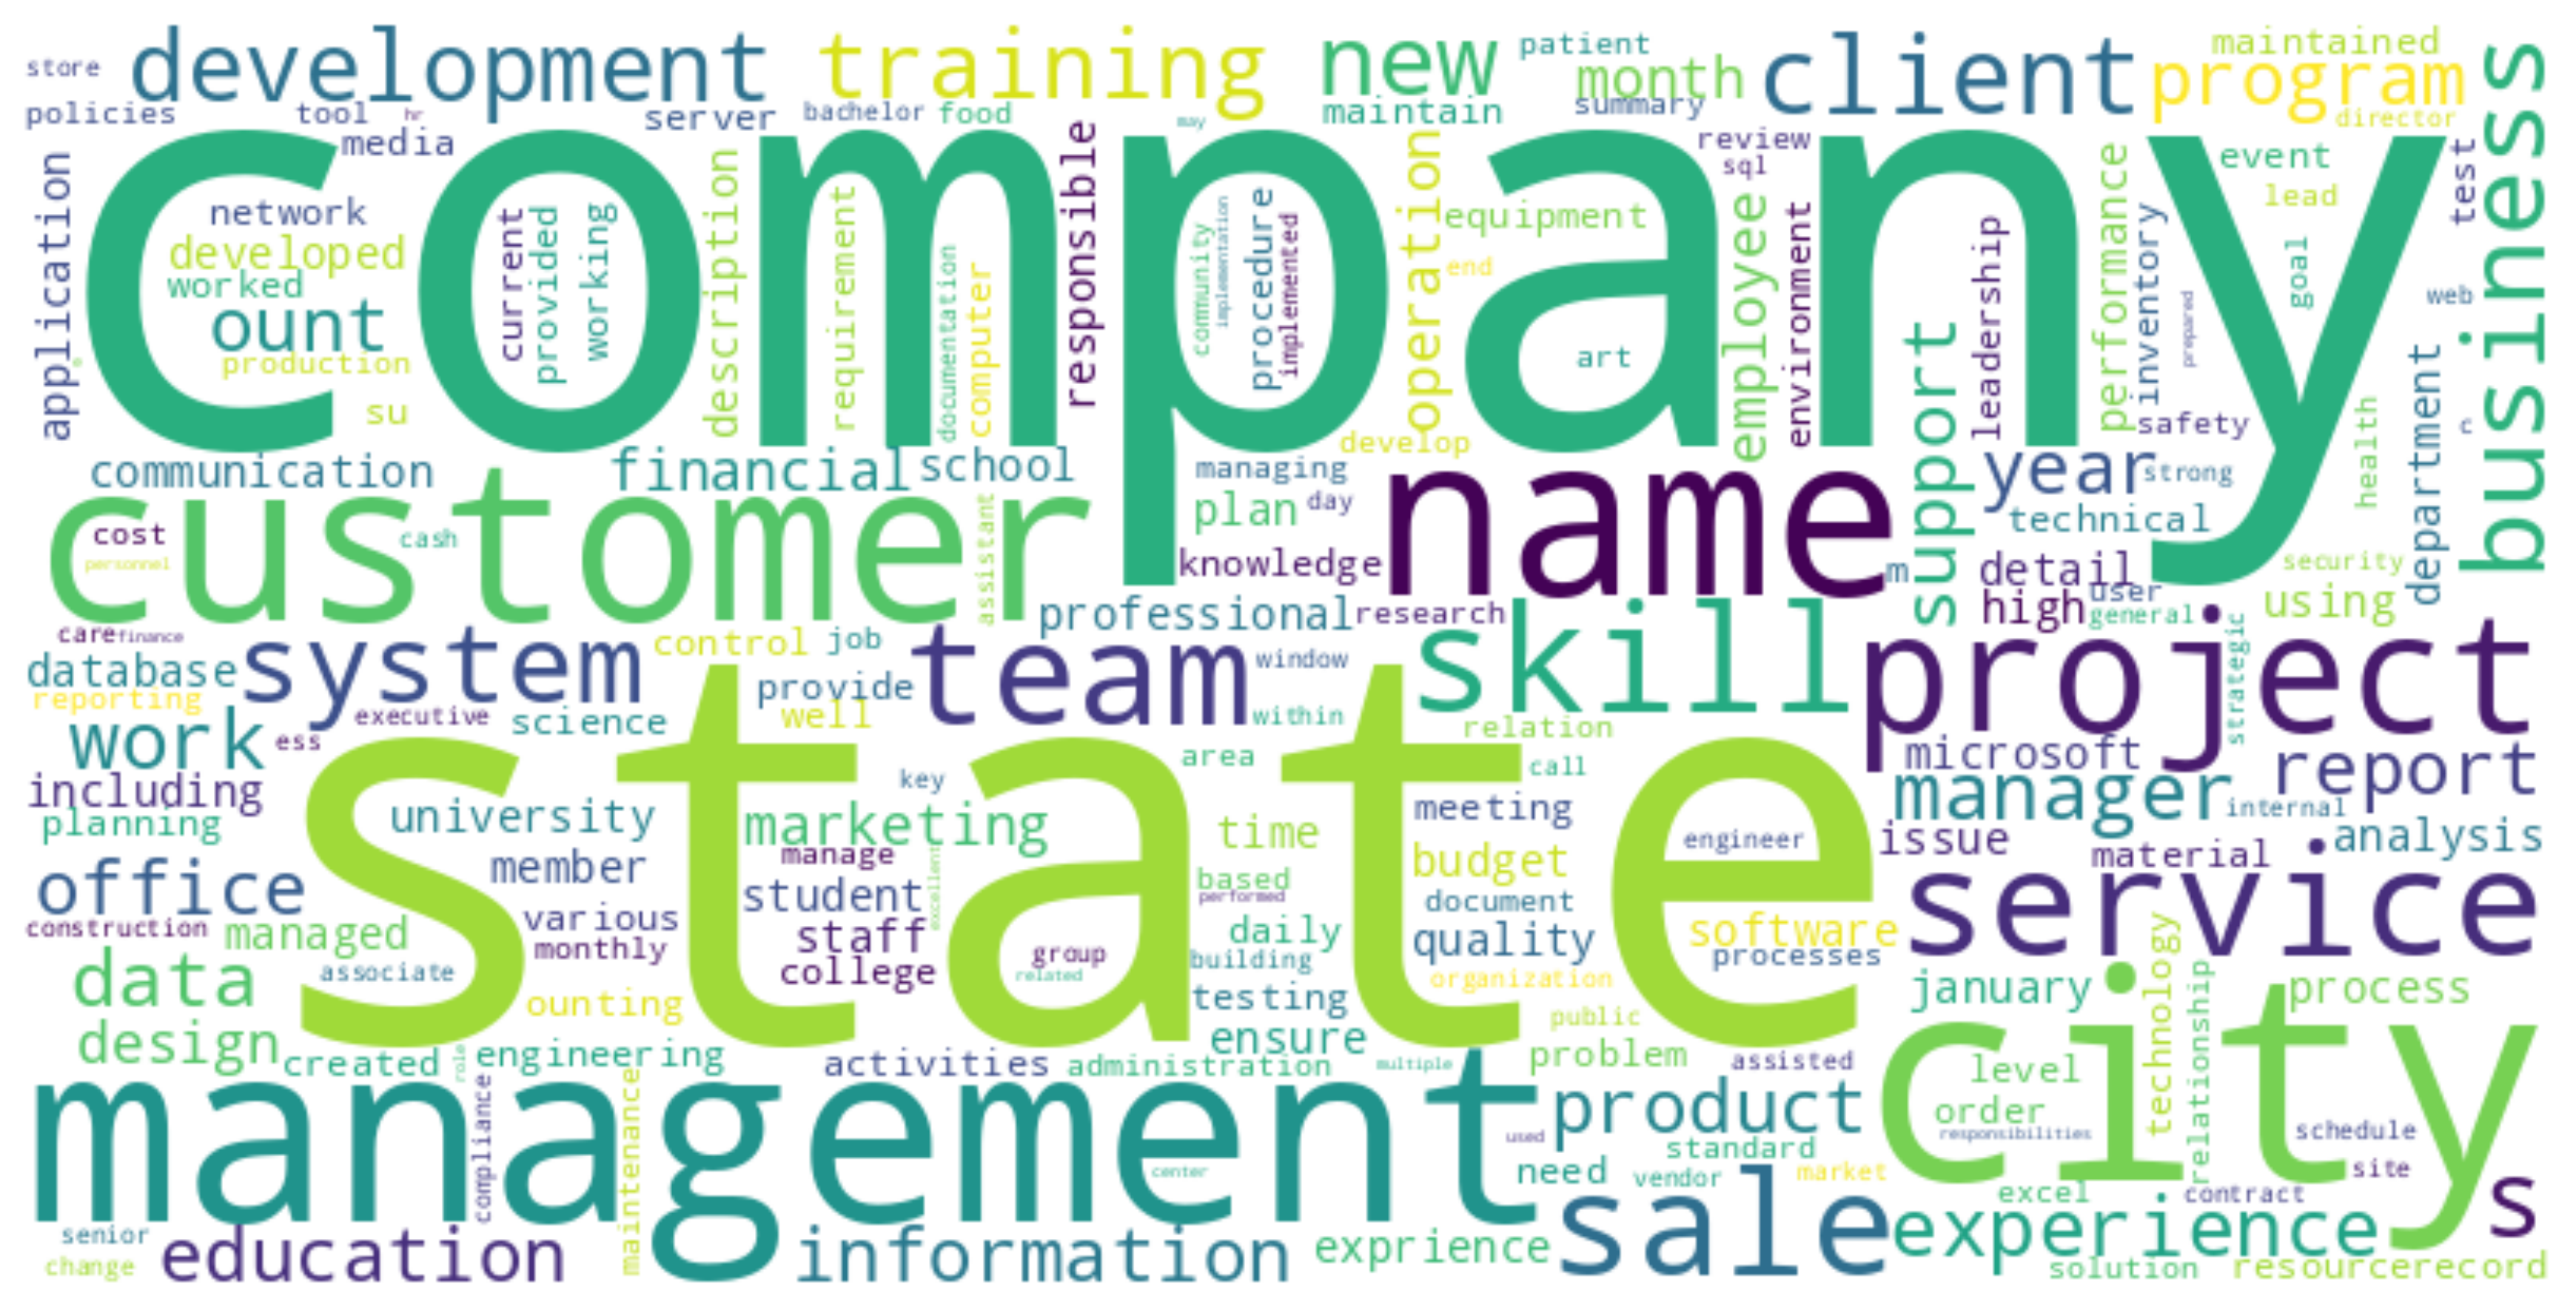

In [19]:
wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(cleaned_sentences)
plt.figure(figsize=(12,6), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [20]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
    
df.head(10)

,Category,Resume,Cleaned_Resume,Category_encoded
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate hr admin...,27
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versat...,27
2,HR,HR DIRECTOR Summary Over 2...,hr director summary over 20 years experience ...,27
3,HR,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven and dy...,27
4,HR,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depa...,27
5,HR,HR GENERALIST Summary Dedic...,hr generalist summary dedicated and focused a...,27
6,HR,HR MANAGER Summary HUMAN RES...,hr manager summary human resources manager ex...,27
7,HR,HR MANAGER Professional Summa...,hr manager professional summary senior hr pro...,27
8,HR,HR SPECIALIST Summary Posses...,hr specialist summary possess 15 years of exp...,27
9,HR,HR CLERK Summary Translates ...,hr clerk summary translates business vision i...,27


In [21]:
def label_table(df):
    label_table = pd.DataFrame({
        'Original': df['Category'].unique(),
        'Label': df['Category_encoded'].unique(),
        'Count': df.groupby('Category')['Category'].count().values
    })
    label_table.sort_values(by='Count', ascending=False, inplace=True)
    return label_table

In [22]:
label_table(df).style.background_gradient(cmap='Purples')

,Original,Label,Count
29,Business Analyst,11,232
39,ETL Developer,23,156
27,Civil Engineer,14,154
4,Advocate,1,139
1,Designer,19,138
12,Automobile,6,120
30,SAP Developer,38,120
25,Mechanical Engineer,32,118
26,Health and fitness,28,118
13,Chef,13,118


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [24]:
text = df['Cleaned_Resume'].values
target = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english'
)

word_vectorizer.fit(text)
word_features = word_vectorizer.transform(text)

print("Feature processing completed..")

X_train, X_test, y_train, y_test = train_test_split(word_features, target, random_state=42, test_size=0.2, shuffle=True, stratify=target)
print(f'Train data: \nRows: {X_train.shape[0]} and Columns: {X_train.shape[1]}')
print(f'Test data: \nRows: {X_test.shape[0]} and Columns: {X_test.shape[1]}')


Feature processing completed..
Train data: 
Rows: 2756 and Columns: 41584
Test data: 
Rows: 690 and Columns: 41584


In [25]:
clf = OneVsRestClassifier(KNeighborsClassifier())
%time clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(f'Accuracy of KNeighbors Classifier on training set: :.2f{clf.score(X_train, y_train)}')
print(f'Accuracy of KNeighbors Classifier on test set: :.2f{clf.score(X_test, y_test)}')

CPU times: user 197 ms, sys: 168 ms, total: 364 ms
Wall time: 365 ms
Accuracy of KNeighbors Classifier on training set: :.2f0.7427431059506531
Accuracy of KNeighbors Classifier on test set: :.2f0.6420289855072464


In [26]:
clf_report = metrics.classification_report(y_test, prediction)
print(f"Classification report: \n{clf_report}")

Classification report: 
                           precision    recall  f1-score   support

               Accountant       0.49      0.75      0.59        24
                 Advocate       0.57      0.29      0.38        28
              Agriculture       0.75      0.23      0.35        13
                  Apparel       0.55      0.32      0.40        19
                     Arts       0.83      0.36      0.50        28
       Automation Testing       1.00      0.80      0.89         5
               Automobile       1.00      0.14      0.25         7
                 Aviation       0.67      0.43      0.53        23
                      BPO       0.00      0.00      0.00         4
                  Banking       0.45      0.22      0.29        23
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       0.86      1.00      0.92         6
     Business Development       0.31      0.62      0.41        24
                     Chef       0.94 